SAI RAINA
USC ID = 4650068238
Github Username = saitiger

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,accuracy_score,recall_score, f1_score ,auc,roc_curve,confusion_matrix 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import NearestNeighbors
import random
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv(r'../Data/wdbc.csv')
df = df.drop(['842302'],axis=1)
y = df['M']
x = df.iloc[:,1:]

In [4]:
y.value_counts()

B    357
M    211
Name: M, dtype: int64

In [5]:
minMaxScaler = preprocessing.MinMaxScaler()
df_norm = minMaxScaler.fit_transform(x)
df_norm = pd.DataFrame(df_norm)
df_norm = pd.concat([df_norm, df['M']], axis=1)

In [6]:
df_norm.rename(columns={'M':'Diagnosis'},inplace=True)

In [7]:
df_norm["Diagnosis"] = df_norm["Diagnosis"].map( {'M':0, 'B':1} )

In [8]:
df_norm['Diagnosis'].value_counts()

1    357
0    211
Name: Diagnosis, dtype: int64

In [14]:
precision_test =[]
recall_test = []
f_test = []
auc_test =[] 
acc_score_test = []


precision_train = []
recall_train = []
f_train = []
auc_train = [] 
acc_score_train = []

for i in range(1,31):
    df_mal = df_norm[df_norm['Diagnosis']==0]

    df_mal_sample = df_mal.sample(frac=.20,random_state=random.randint(1,100))

    df_ben = df_norm[df_norm['Diagnosis']==1]
    df_ben_sample = df_ben.sample(frac=.20,random_state=random.randint(1,100))

    df_test = pd.concat([df_ben_sample,df_mal_sample]) 
    index1 = df_test.index
    df_train = df_norm.drop(index= index1)
    x_test = df_test.drop(['Diagnosis'],axis=1)
    y_test = df_test['Diagnosis']
    x_train = df_train.drop(['Diagnosis'],axis=1)
    y_train = df_train['Diagnosis']
    
    parameters = [{'C': [1, 10, 100,1000]}]   
    clf1 = GridSearchCV(LinearSVC(penalty='l1',dual=False),parameters,cv = 5)
    clf1.fit(x_train, y_train)
    y_pred1 = clf1.predict(x_test)
    
    precision_test.append(precision_score(y_test, y_pred1))
    recall_test.append(recall_score(y_test, y_pred1))
    acc_score_test.append(accuracy_score(y_test, y_pred1)) 
    f_test.append(f1_score(y_test, y_pred1))
    fpr_test, tpr_test, _ = roc_curve(y_test,y_pred1)
    auc_test.append(auc(fpr_test, tpr_test))
    
    parameters = [{'C': [1, 10, 100,1000]}]   
    clf2 = GridSearchCV(LinearSVC(penalty='l1',dual=False),parameters,cv = 5)
    clf2.fit(x_train, y_train)
    y_pred2 = clf2.predict(x_train)
     
    precision_train.append(precision_score(y_train, y_pred2))
    recall_train.append(recall_score(y_train, y_pred2))
    acc_score_train.append(accuracy_score(y_train, y_pred2)) 
    f_train.append(f1_score(y_train,y_pred2))
    fpr_train, tpr_train, _ = roc_curve(y_train,y_pred2)
    auc_train.append(auc(fpr_train, tpr_train))
    
print("TEST")
avg_precision_test = np.mean(precision_test)
avg_f1_test = np.mean(f_test)
avg_recall_test = np.mean(recall_test)
avg_acc_score_test = np.mean(acc_score_test)
print(f"Average Accuraccy Score : {avg_acc_score_test}\nAverage Precision : {avg_precision_test}\nAverage Recall : {avg_recall_test}\nAverage F1 : {avg_f1_test}")

print("\n")

print("TRAIN")
avg_precision_train = np.mean(precision_train)
avg_f1_train = np.mean(f_train)
avg_recall_train = np.mean(recall_train)
avg_acc_score_train= np.mean(acc_score_test)
print(f"Average Accuraccy Score : {avg_acc_score_train}\nAverage Precision : {avg_precision_train}\nAverage Recall : {avg_recall_train}\nAverage F1 : {avg_f1_train}")

TEST
Average Accuraccy Score : 0.9700945987183399
Average Precision : 0.9676994495506345
Average Recall : 0.9859154929577467
Average F1 : 0.9765132912790028


TRAIN
Average Accuraccy Score : 0.9700945987183399
Average Precision : 0.9829918626041677
Average Recall : 0.9945743911261153
Average F1 : 0.988740972800784


In [15]:
cm_test = confusion_matrix(y_test,y_pred1)
print("Confusion Matrix (TEST) : ",cm_test)

cm_train = confusion_matrix(y_train,y_pred2)
print("Confusion Matrix (TRAIN) : ",cm_train)

Confusion Matrix (TEST) :  [[40  2]
 [ 1 70]]
Confusion Matrix (TRAIN) :  [[167   2]
 [  1 285]]


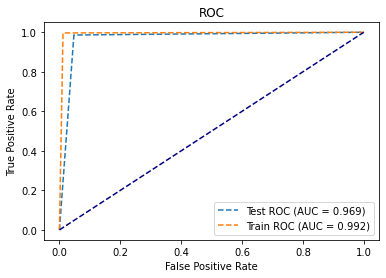

In [16]:
plt.plot(fpr_test,tpr_test, linestyle='--', label='Test ROC (AUC = %0.3f)' % auc(fpr_test,tpr_test))
plt.plot(fpr_train,tpr_train, linestyle='--', label='Train ROC (AUC = %0.3f)' % auc(fpr_train,tpr_train))
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [ ]:
precision_test =[]
recall_test = []
f_test = []
auc_test =[] 
acc_score_test = []
precision_train = []
recall_train = []
f_train = []
auc_train = [] 
acc_score_train = []

for i in range(1,31):
    
    df_mal = df_norm[df_norm['Diagnosis']==0]
    df_ben = df_norm[df_norm['Diagnosis']==1]
    df_mal_sample = df_mal.sample(frac=.50,random_state=random.randint(1,100))
    df_ben_sample = df_ben.sample(frac=.50,random_state=random.randint(1,100))
    df_test = pd.concat([df_ben_sample,df_mal_sample])

    index1 = df_test.index
    df_train = df_norm.drop(index= index1)
    df_lbl = df_train
    df_unlbl = df_test.drop('Diagnosis',axis=1)
    y_unlbl = df_test['Diagnosis']
    df_unlbl_final = df_unlbl.reset_index(drop=True)
    df_unlbl = df_unlbl_final
    x_lbl = df_train.drop(['Diagnosis'],axis=1)
    x_lbl = x_lbl.reset_index(drop=True)
    y_lbl = df_train['Diagnosis']
    y_lbl = y_lbl.reset_index(drop=True)
    
    x_lbl_final = df_train.drop(['Diagnosis'],axis=1)
    x_lbl_final = x_lbl_final.reset_index(drop=True)
    y_lbl_final = df_train['Diagnosis']
    y_lbl_final = y_lbl_final.reset_index(drop=True)
    
    for j in range(len(df_unlbl)):
        parameters = [{'C': [0.1,0.001,1, 10, 100, 1000],'max_iter':[2000]}]
        clf = GridSearchCV(LinearSVC(penalty='l1',dual=False),parameters,cv=5)
        clf.fit(x_lbl,y_lbl)
        l = int(np.argmax(clf.decision_function(df_unlbl)))
        max_dist_val = pd.Series.to_frame(df_unlbl.iloc[l,:]).T
        pred_app = pd.DataFrame(clf.predict(max_dist_val))
        y_lbl = pd.concat([y_lbl,pred_app],axis=0)
        x_lbl = x_lbl.append(max_dist_val)
        df_unlbl = df_unlbl.drop(index=l,axis=0)
        df_unlbl = df_unlbl.reset_index(drop=True)
    
    y_pred_test = clf.predict(df_unlbl_final)
    precision_test.append(precision_score(y_unlbl, y_pred_test))
    recall_test.append(recall_score(y_unlbl,y_pred_test))
    acc_score_test.append(accuracy_score(y_unlbl, y_pred_test)) 
    f_test.append(f1_score(y_unlbl, y_pred_test))
    fpr_test, tpr_test, _ = roc_curve(y_unlbl,y_pred_test)
    auc_test.append(auc(fpr_test, tpr_test))
    
    y_pred_train=clf.predict(x_lbl_final) 
    precision_train.append(precision_score(y_lbl_final, y_pred_train))
    recall_train.append(recall_score(y_lbl_final,y_pred_train))
    acc_score_train.append(accuracy_score(y_lbl_final, y_pred_train)) 
    f_train.append(f1_score(y_lbl_final, y_pred_train))
    fpr_train, tpr_train, _ = roc_curve(y_lbl_final,y_pred_train)
    auc_train.append(auc(fpr_train, tpr_train))

print("TRAIN")
print("Average Precision : ",np.mean(precision_train))
print("Average F1 Score : ",np.mean(f_train))
print("Average Recall : ",np.mean(recall_train))
print("Average AUC : ",np.mean(auc_train))
print("Average Accuraccy : ",np.mean(acc_score_train))
print("TEST ")
print("Average Precision : ",np.mean(precision_test))
print("Average F1 Score : ",np.mean(f_test))
print("Average Recall : ",np.mean(recall_test))
print("Average AUC: ",np.mean(auc_test))
print("Average Accuraccy : ",np.mean(acc_score_test))

In [ ]:
cm_test = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix (TEST) : ",cm_test)

cm_train = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix (TRAIN) : ",cm_train)

In [ ]:
plt.plot(fpr_test,tpr_test, linestyle='--', label='Test ROC (AUC = %0.3f)' % auc(fpr_test,tpr_test))
plt.plot(fpr_train,tpr_train, linestyle='--', label='Train ROC (AUC = %0.3f)' % auc(fpr_train,tpr_train))
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

To avoid local minima we run kmeans algorithm multiple times and report the instance where the wcss is minimum. By running 
kmeans repeatedly we are essentially relying on the fact that the initial random assignment of clusters in some cases will lead 
to a final kmeans model that is not stuck in local minima.


In [ ]:
precision_test =[]
recall_test = []
f_test = []
auc_test =[] 
acc_score_test = []

precision_train = []
recall_train = []
f_train = []
auc_train = [] 
acc_score_train = []

for i in range(1,31):
    
    df_mal = df_norm[df_norm['Diagnosis']==0]
    df_ben = df_norm[df_norm['Diagnosis']==1]
    df_mal_sample = df_mal.sample(frac=.20,random_state=random.randint(1,100))
    df_ben_sample = df_ben.sample(frac=.20,random_state=random.randint(1,100))
    
    df_test = pd.concat([df_ben_sample,df_mal_sample]) 
    index1 = df_test.index
    df_train = df_norm.drop(index= index1)
    df_test.reset_index(drop=True,inplace=True)
    x_test = df_test.drop(['Diagnosis'],axis=1)
    y_test = df_test['Diagnosis']
    x_train = df_train.drop(['Diagnosis'],axis=1)
    y_train = df_train['Diagnosis']
    x_train.reset_index(drop=True,inplace=True)
    y_train.reset_index(drop=True,inplace=True)

    kmeans = KMeans(n_clusters=2,init = 'random')
    kmeans.fit(x_train)
    nbrs = NearestNeighbors(n_neighbors=30).fit(x_train)

    print(kmeans.cluster_centers_)
    distances, indices = nbrs.kneighbors(kmeans.cluster_centers_)
    cls1 = y_train.loc[indices[0]]
    p1 = cls1.value_counts()
    cls2 = y_train.loc[indices[1]]
    p21 = cls2.value_counts()
    
    y_pred = kmeans.labels_
    y_pred = pd.DataFrame(y_pred)
    y_pred1 = y_pred[y_pred[0]==0]
    y_pred2 = y_pred[y_pred[0]==1]

    max_index_0 = np.argmax(p1)
    max_index_1 = np.argmax(p2)

    y_pred1['class'] = max_index_0
    y_pred2['class'] = max_index_1
    y_pred_train = pd.concat([y_pred1['class'],y_pred2['class']],axis=0)
    y_pred_train = y_pred_train.sort_index()

    precision_train.append(precision_score(y_train, y_pred_train))
    recall_train.append(recall_score(y_train, y_pred_train))
    acc_score_train.append(accuracy_score(y_train, y_pred_train)) 
    f_train.append(f1_score(y_train, y_pred_train))
    fpr_train, tpr_train, _ = roc_curve(y_train,y_pred_train)
    auc_train.append(auc(fpr_train, tpr_train))
    
    y_pred_test = kmeans.predict(x_test)
    precision_test.append(precision_score(y_test, y_pred_test))
    recall_test.append(recall_score(y_test, y_pred_test))
    acc_score_test.append(accuracy_score(y_test, y_pred_test)) 
    f_test.append(f1_score(y_test, y_pred_test))
    fpr_test, tpr_test, _ = roc_curve(y_test,y_pred_test)
    auc_test.append(auc(fpr_test, tpr_test))

In [ ]:
print("TRAIN")
print("Average Precision : ",np.mean(precision_train))
print("Average F1 Score : ",np.mean(f_train))
print("Average Recall : ",np.mean(recall_train))
print("Average AUC : ",np.mean(auc_train))
print("Average Accuraccy : ",np.mean(acc_score_train))
print("TEST ")
print("Average Precision : ",np.mean(precision_test))
print("Average F1 Score : ",np.mean(f_test))
print("Average Recall : ",np.mean(recall_test))
print("Average AUC: ",np.mean(auc_test))
print("Average Accuraccy : ",np.mean(acc_score_test))

In [ ]:
cm_test = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix (TEST) : ",cm_test)

cm_train = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix (TRAIN) : ",cm_train)

In [ ]:
plt.plot(fpr_test,tpr_test, linestyle='--', label='Test ROC (AUC = %0.3f)' % auc(fpr_test,tpr_test))
plt.plot(fpr_train,tpr_train, linestyle='--', label='Train ROC (AUC = %0.3f)' % auc(fpr_train,tpr_train))
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Spectral clustering uses similarity of the data to perform dimensionality reduction before clustering in fewer dimensions. 
An advantage of spectral clustering is that it runs/ computes clusters very fast for a sparse dataset.
The spectral clustering algorithm is treated as a graph partitioning problem. 
The data points/nodes are mapped to a low-dimensional space that can be easily segregated to form clusters. 
Points that are connected or are adjacent to each other are assigned to the same cluster. 


In [ ]:
precision_test =[]
recall_test = []
f_test = []
auc_test =[] 
acc_score_test = []

precision_train = []
recall_train = []
f_train = []
auc_train = [] 
acc_score_train = []

for i in range(1,30):
    df_mal = df_norm[df_norm['Diagnosis']==0]
    df_ben = df_norm[df_norm['Diagnosis']==1]
    df_mal_sample = df_mal.sample(frac=.20,random_state=random.randint(1,100))
    df_ben_sample = df_ben.sample(frac=.20,random_state=random.randint(1,100))
    
    df_test = pd.concat([df_ben_sample,df_mal_sample]) 
    index1 = df_test.index
    df_train = df_norm.drop(index= index1)
    df_test.reset_index(drop=True,inplace=True)
    x_test = df_test.drop(['Diagnosis'],axis=1)
    y_test = df_test['Diagnosis']
    x_train = df_train.drop(['Diagnosis'],axis=1)
    y_train = df_train['Diagnosis']
    x_train.reset_index(drop=True,inplace=True)
    y_train.reset_index(drop=True,inplace=True)
    
    sc = SpectralClustering(n_clusters=2,affinity='rbf').fit(train_x)
    speclabels = pd.DataFrame(sc.labels_)
    label0= speclabels[speclabels[0]==0].index 
    label1=speclabels[speclabels[0]==1].index
    cluster0=x_train.iloc[label0,:]
    cluster1=x_train.iloc[label1,:]
    center0=cluster0.mean(axis=0)
    center1=cluster1.mean(axis=0)
    centers = pd.DataFrame()
    centers[0] = center0
    centers[1] = center1
    neigh = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(x_train)
    distances, indices = neigh.kneighbors(centers.T)
    clus0= train_y.loc[indices[0]]
    poll0=clus0.value_counts()  
    clus1=train_y.loc[indices[1]]
    poll1=clus1.value_counts()
    y_pred = sc.labels_
    y_pred = pd.DataFrame(y_pred)
    y_pred0 = y_pred[y_pred[0]==0]
    y_pred1 = y_pred[y_pred[0]==1]
    max_index_0=np.argmax(poll0)
    max_index_1=np.argmax(poll1)
    y_pred0['class']=max_index_0
    y_pred1['class']=max_index_1
    y_pred_train=pd.concat([y_pred0['class'],y_pred0['class']],axis=0)
    y_pred_train=y_pred_train.sort_index()
    y_pred = sc.labels_
    y_pred=pd.DataFrame(pred_y)
    y_pred0=y_pred[y_pred[0]==0]
    y_pred1=y_pred[y_pred[0]==1]
    max_index_0=np.argmax(poll0)
    max_index_1=np.argmax(poll1)
    y_pred0['class']=max_index_0
    y_pred1['class']=max_index_1
    y_pred_train=pd.concat([y_pred0['class'],y_pred1['class']],axis=0)
    y_pred_train=y_pred_train.sort_index()
    
    precision_train.append(precision_score(y_train, y_pred_train))
    recall_train.append(recall_score(y_train, y_pred_train))
    acc_score_train.append(accuracy_score(y_train, y_pred_train)) 
    f_train.append(f1_score(y_train, y_pred_train))
    fpr_train, tpr_train, _ = roc_curve(y_train,y_pred_train)
    auc_train.append(auc(fpr_train, tpr_train))
    
    y_pred_test = sc.fit_predict(x_test)
    precision_test.append(precision_score(y_test, y_pred_test))
    recall_test.append(recall_score(y_test, y_pred_test))
    acs.append(accuracy_score(y_test, y_pred_test)) 
    fs.append(f1_score(y_test, y_pred_test))
    fpr_test, tpr_test, _ = roc_curve(y_test,y_pred_test)
    auc_test.append(auc(fpr_test, tpr_test))

In [ ]:
print("TRAIN")
print("Average Precision : ",np.mean(precision_train))
print("Average F1 Score : ",np.mean(f_train))
print("Average Recall : ",np.mean(recall_train))
print("Average AUC : ",np.mean(auc_train))
print("Average Accuraccy : ",np.mean(acc_score_train))
print("TEST ")
print("Average Precision : ",np.mean(precision_test))
print("Average F1 Score : ",np.mean(f_test))
print("Average Recall : ",np.mean(recall_test))
print("Average AUC: ",np.mean(auc_test))
print("Average Accuraccy : ",np.mean(acc_score_test))

In [ ]:
cm_test = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix (TEST) : ",cm_test)

cm_train = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix (TRAIN) : ",cm_train)

In [ ]:
plt.plot(fpr_test,tpr_test, linestyle='--', label='Test ROC (AUC = %0.3f)' % auc(fpr_test,tpr_test))
plt.plot(fpr_train,tpr_train, linestyle='--', label='Train ROC (AUC = %0.3f)' % auc(fpr_train,tpr_train))
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

It can be concluded that supervised learning on full dataset is working better as compared to semi-supervised learning 
with half of the labeled dataset. 
Unsupervised learning is also not performing as per expectation. 
The conclusion is based on the auc,roc curves as well as precision and 
recall metrics for the given algorithms averages over the monte carlo simulations.

In [38]:
df2 = pd.read_csv(r'../Data/data_banknote_authentication.txt')
df2.rename(columns={'0':"class"},inplace=True)
df2.head()

,3.6216,8.6661,-2.8073,-0.44699,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [65]:
test = df2.sample(472)
index_test = test.index
train= df2.drop(index=index_test)
y_test=test.iloc[:,-1:]
x_test=test.iloc[:,:-1]
y_train=train.iloc[:,-1:]
x_train=train.iloc[:,:-1]
x_train=x_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
x_test=x_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

df_acs1=pd.DataFrame()
for x in range(0,50):
    acs1=[]
    x_tr=pd.DataFrame()
    y_tr=pd.DataFrame()
    skf=StratifiedKFold(n_splits=90)
    cv=2
    for train_index, tr_index_10 in skf.split(x_train, y_train):
            x_tr=pd.concat([x_tr,x_train.iloc[tr_index_10,:]])
            y_tr=pd.concat([y_tr,y_train.iloc[tr_index_10]])
            parameters = [{'C': [0.1,0.001,1, 10, 100, 1000],'max_iter':[2000]} ]
            model = GridSearchCV(svm.LinearSVC(penalty='l1',dual=False),parameters,cv=cv)
            cv=10
            model.fit(x_tr, y_tr.values.ravel())
    
            pred_y = model.predict(x_test)
            acs1.append(accuracy_score(y_test, pred_y)) 
    df_acs1=pd.concat([df_acs1,pd.DataFrame(acs1)],axis=1)

In [63]:
df_acs=pd.DataFrame()
for x in range(0,50):
    test=df2.sample(472)
    index_test=test.index
    train= df2.drop(index=index_test)
    y_test=test.iloc[:,-1:]
    x_test=test.iloc[:,:-1]
    y_train=train.iloc[:,-1:]
    x_train=train.iloc[:,:-1]
    x_tr=pd.DataFrame()
    y_tr=pd.DataFrame()
    acs=[]
    skf=StratifiedKFold(n_splits=90)
    cv=2
    for train_index, tr_index_10 in skf.split(x_train, y_train):
       # print(tr_index_10)
        x_tr=x_train.iloc[tr_index_10,:]
        y_tr=y_train.iloc[tr_index_10,:]
        #print(y_tr)
        break
    for x in range(0,90):
        #print(x)
        x_train=x_train.reset_index(drop=True)
        y_train=y_train.reset_index(drop=True)
        x_test=x_test.reset_index(drop=True)
        y_test=y_test.reset_index(drop=True)
        parameters = [{'C': [0.1,0.001,1, 10, 100, 1000],'max_iter':[2000]} ]
        model = GridSearchCV(svm.LinearSVC(penalty='l1',dual=False),parameters,cv=cv)
        cv=10
        #print('Grid')
        model.fit(x_tr, y_tr.values.ravel())           
        dist=pd.DataFrame(abs(model.decision_function(x_train)))
        dist_sort= dist.sort_values(0) 
        dist_sort=dist_sort.iloc[0:10,:]
        indexes=dist_sort.index

        #print(y_train.iloc[230,:])
        x_tr=pd.concat([x_tr,x_train.iloc[indexes,:]],axis=0)
        y_tr=pd.concat([y_tr,y_train.iloc[indexes,:]],axis=0)
        x_tr.reset_index(drop=True,inplace=True)
        y_tr.reset_index(drop=True,inplace=True)
        x_train=x_train.drop(index=indexes) 
        y_train=y_train.drop(index=indexes)
        #calculating train parameters
        pred_y = model.predict(x_test)
        acs.append(accuracy_score(y_test, pred_y))
    df_acs=pd.concat([df_acs,pd.DataFrame(acs)],axis=1)


In [66]:
avg_passive_learning =np.mean(df_acs1,axis=1)
avg_active_learning = np.mean(df_acs,axis=1)

Text(0, 0.5, 'Average Test Error')

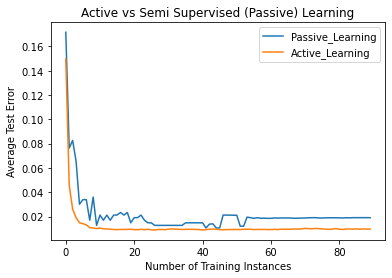

In [67]:
res = pd.DataFrame({'Passive_Learning':1-avg_passive_learning, 'Active_Learning':1-avg_active_learning})

ax = res.plot(style='-',title='Active vs Semi Supervised (Passive) Learning')
ax.set_xlabel("Number of Training Instances")
ax.set_ylabel("Average Test Error")

The average test error decreases rapidly for both active learning and passive learning as the number of training instances increases.
Active learning model is taking more time to reach the low test error as compared to SSL.

# References :
<ol>
    <li>https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html</li>
    <li>https://www.mygreatlearning.com/blog/introduction-to-spectral-clustering/</li>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html</li>
    <li>https://stackoverflow.com/questions/61291741/passing-list-likes-to-loc-or-with-any-missing-labels-is-no-longer-supported</li>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html</li>
    <li>https://realpython.com/k-means-clustering-python/</li>
    <li> https://en.wikipedia.org/wiki/Spectral_clustering</li>
</ol>  